# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса  — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно определить рыночную стоимость объектов недвижимости. Установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') # откроем файл и посмотрим на данные. Выведем первые 10 строк.
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
df.info() # посмотрим основную информацию о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

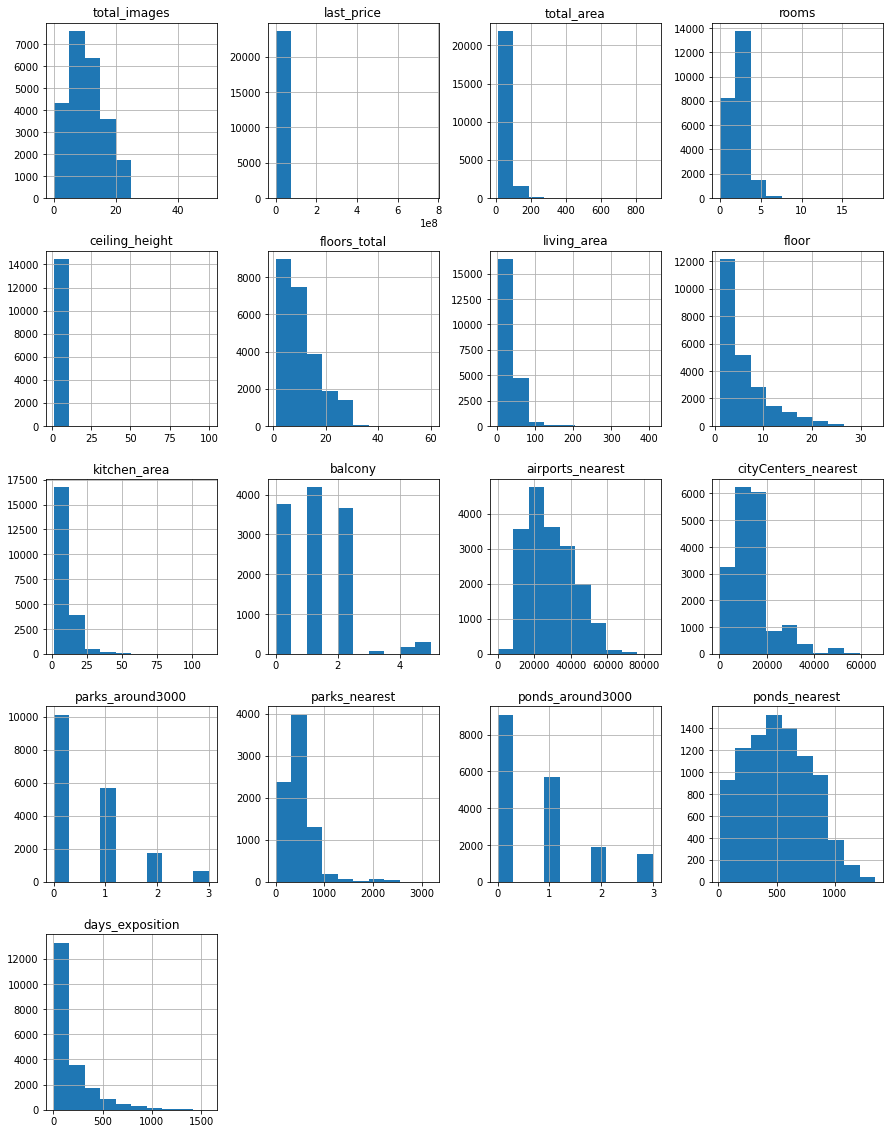

In [4]:
df.hist(figsize=(15, 20));

**Вывод:**<br>
Мы видим датасет из 22 столбцов и  23699 строк, который содержит в себе информацию о продажи квартир. Мы видим, практически сразу, что в нем есть пустые значения во многих столбцах. Неверные форматы данных в столбцах: first_day_exposition, is_apartment.

### Предобработка данных

In [5]:
df = df.rename(columns = {'cityCenters_nearest' : 'cityсenters_nearest'}) # сначала скорректируем название столбца cityCenters_nearest
print(df.columns)

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityсenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')


In [6]:
df.isna().sum() # теперь узнаем в каких столбцах нет данных и сколько их всего

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityсenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

В данных очень много пропусков в столбце с числом балконов. Скорее всего их в этих квартирах нет. Поэтому заменим все пропуски на нули.

In [7]:
df['balcony'] = df['balcony'].fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Больше пустых значений в количестве балконов нет. Скорее всего пропуски появились в результате человеческой ошибки при заполнении. Сотрудник (продавец) просто не стал отмечать в поле число балконов, а оставил его пустым, вероятно подумав, что раз их нет, то и смысла заполнять поле нет. Можно также заполнить пропуски в `is_apartment`. Если в квартире одна комната, то она вполне подходит под определение апартаментов.

In [8]:
df.loc[(df['is_apartment'].isna())&(df['rooms']==1), 'is_apartment'] = 1
df.loc[(df['is_apartment'].isna())&(df['rooms']!=1), 'is_apartment'] = 0
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityсenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,0,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,1,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,0,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,0,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,0,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,1,False,False,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,1,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,0,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,1,False,False,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,0,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Также поставим нули в `parks_around3000` и `ponds_around3000` по аналогии с балконами. Т.е. если продавец не указал, то, скорее всего, парков и водоемов в указанном радиусе нет.

In [9]:
df['parks_around3000'] = df['parks_around3000'].fillna(0)
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityсenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

С точки зрения пропусков данные выглядят уже значительно лучше. Устанавливать медианные значения по высоте потолков, этажей в доме, жилой площади, площади кухни, кажется не разумным, т.к. дома могут быть разной планировки, разного статуса, находится в разных районах, поэтому усреднять их не стоит. Лучше пока оставить как есть. Но, что крайне интересно, так это отсутствие данных, которые должны формироваться автоматически в полях расстояние до аэропорта, расстояние до центра, ближайший парт или водоем. Возможно пустые данные признак технической ошибки.

In [10]:
df['floors_total'] = df['floors_total'].where(df['floors_total'].notnull(), df['floor']) # заменили пропуски этажом, на котором находится квартира

In [11]:
mean_living_area = round(df['living_area'].mean() / df['total_area'].mean() * 100) # найдем соотношение средней жилой площади к средней общей площади
mean_kitchen_area = round(df['kitchen_area'].mean() / df['living_area'].mean() * 100) # найдем соотношение средней площади кухни к средней жилой площади
print ('Отношение жилой площади к общей равно', mean_living_area)
print ('Отношение площади кухни к жилой площади равно', mean_kitchen_area)

Отношение жилой площади к общей равно 57
Отношение площади кухни к жилой площади равно 31


In [12]:
df['living_area'] = df['living_area'].fillna(mean_living_area) # заполним пропуски в данных полученными ранее значениями
df['kitchen_area'] = df['kitchen_area'].fillna(mean_kitchen_area)
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest         5542
cityсenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

Теперь нужно навести порядок с типами данных.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [14]:
df['is_apartment'] = df['is_apartment'].astype(bool) # присвоим булевый тип столбцу апартаменты, а другим столбцам, каким возможно, целочисленный
df['last_price'] = df['last_price'].astype(int) 
df['balcony'] = df['balcony'].astype(int)
df['parks_around3000'] = df['parks_around3000'].astype(int)
df['ponds_around3000'] = df['ponds_around3000'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  int64  
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  int64  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [15]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d %H:%M:%S') # исправим тип данных в столбце first_day_exposition 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23699 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

Теперь с типами данных все в порядке: булевые - bool, дата - datetime, строковые - object. Если не исправить типы данных сейчас, то потом они могли бы испортить все исследование, не позволяя проводить операции и манипуляции с данными.

In [16]:
df['locality_name'].unique() # выведем уникальные значения населенных пунктов

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [17]:
def rename(row):  # среди населенных пунктов есть неявные дубликаты. Создадим функцию, чтобы это исправить
    try:
        if 'Рябово' in row:
            return 'поселок Рябово'
        elif 'Тельмана' in row:
            return 'поселок Тельмана'
        else:
            return row
    except:
        return row

In [18]:
df['locality_name'] = df['locality_name'].apply(rename)

In [19]:
df['locality_name'].unique() # проверяем изменения. Видим, что поселка городского типа Рябово нет. Есть только поселок Рябово. Изменения прошли.

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Теперь проведем проверку значений в столбцах на поиск аномалий - значения, которые значительно выбиваются или отличаются от общей массы.

In [20]:
df['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

Обнаружили странные данные в высоте потолков. Вероятно значения 32, 26 это 3,2 и 2,6 соответственно. Приведем данные в порядок.

In [21]:
df.loc[(df['ceiling_height']>=10), 'ceiling_height'] = df.loc[(df['ceiling_height']>=10), 'ceiling_height']/10 # сократим анамалии на порядок

In [22]:
df['ceiling_height'].unique() # проверили и столь значительных анамалий уже не видим

array([ 2.7 ,   nan,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  2.65,  3.2 ,  2.61,  3.25,  3.45,
        2.77,  2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,
        2.47,  2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,
        2.51,  2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,
        2.59,  2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,
        3.55,  3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,
        5.  ,  2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,
        4.7 ,  2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,
        2.3 ,  3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,
        3.95,  3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,
        3.24,  4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,
        3.09,  8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,
        2.68,  3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,
        3.32,  1.2 ,

В данных о высоте потолков много неясного. Как может быть высота потолков - 6, 8, 10 метров? Практически с двух или трех этажный дом. При этом в данных есть и низкие значения - 1 метр или 1,2 метра, что тоже не возможно встретить в реальной жизни. Объяснить логически такие аномалии очень сложно, поэтому от них стоит избавиться.

In [23]:
df = df[(~(df['ceiling_height'] < 2)) & (~(df['ceiling_height'] > 4))] # оставим только те данные которые соответствуют условию, что высота потолков должна быть от 2 до 4 метров.

In [24]:
df['ceiling_height'].unique()

array([2.7 ,  nan, 3.03, 2.5 , 2.67, 2.56, 3.05, 2.75, 2.6 , 2.9 , 2.8 ,
       2.55, 3.  , 2.65, 3.2 , 2.61, 3.25, 3.45, 2.77, 2.85, 2.64, 2.57,
       3.5 , 3.3 , 2.71, 4.  , 2.47, 2.73, 2.84, 3.1 , 2.34, 3.4 , 3.06,
       2.72, 2.54, 2.51, 2.78, 2.76, 2.58, 3.7 , 2.52, 2.87, 2.66, 2.59,
       2.  , 2.45, 3.6 , 2.92, 3.11, 3.13, 3.8 , 3.15, 3.55, 3.16, 3.62,
       3.12, 2.53, 2.74, 2.96, 2.46, 2.79, 2.95, 2.94, 3.82, 3.54, 3.53,
       2.83, 2.4 , 3.38, 3.01, 3.65, 3.9 , 3.18, 3.35, 2.3 , 3.57, 2.48,
       2.62, 2.82, 3.98, 2.63, 3.83, 3.52, 3.95, 3.75, 2.88, 3.67, 3.87,
       3.66, 3.85, 3.86, 3.24, 3.36, 3.08, 3.68, 3.07, 3.37, 3.09, 3.26,
       3.34, 2.81, 3.44, 2.97, 3.14, 2.68, 3.22, 3.27, 2.93, 3.46, 3.47,
       3.33, 3.63, 3.32, 2.98, 2.86, 3.17, 3.28, 3.04, 3.84, 3.23, 3.02,
       3.21, 3.43, 3.78, 3.39, 2.69, 3.31, 3.56, 2.2 , 3.51, 3.93, 3.42,
       2.99, 3.49, 2.91, 3.88, 3.29, 2.25, 3.76, 3.69, 2.26, 2.89, 3.58,
       2.49, 3.48, 3.59])

Теперь, когда данные по высоте потолков очищены от аномалий, мы можем заменить пустые значения медианными.

In [25]:
df.loc[df['ceiling_height'].isna(), 'ceiling_height'] = df['ceiling_height'].median()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23643 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23643 non-null  int64         
 1   last_price            23643 non-null  int64         
 2   total_area            23643 non-null  float64       
 3   first_day_exposition  23643 non-null  datetime64[ns]
 4   rooms                 23643 non-null  int64         
 5   ceiling_height        23643 non-null  float64       
 6   floors_total          23643 non-null  float64       
 7   living_area           23643 non-null  float64       
 8   floor                 23643 non-null  int64         
 9   is_apartment          23643 non-null  bool          
 10  studio                23643 non-null  bool          
 11  open_plan             23643 non-null  bool          
 12  kitchen_area          23643 non-null  float64       
 13  balcony         

In [26]:
df['floors_total'].value_counts()

5.0     5776
9.0     3765
16.0    1373
12.0    1367
4.0     1203
10.0    1177
25.0    1075
6.0      915
17.0     834
3.0      663
7.0      590
14.0     554
18.0     508
24.0     471
8.0      397
2.0      384
15.0     368
23.0     353
19.0     342
22.0     287
20.0     273
13.0     232
11.0     206
27.0     164
21.0     162
26.0     123
1.0       28
35.0      24
28.0      21
36.0       3
29.0       1
60.0       1
52.0       1
34.0       1
33.0       1
Name: floors_total, dtype: int64

Изучив информацию о количестве этажей в зданиях, мы также замечаем аномалии - 60, 52, 35 этаж. Удалим аномалии - здания выше 27 этажей.

In [27]:
df = df[(~(df['floors_total'] > 27))]

In [30]:
min_price = df['last_price'].min() # рассмотрим диапазон цен недвижимости
max_price = df['last_price'].max()
print(f'Разброс цен в стоимости жилья от {min_price} до {max_price} руб.')

Разброс цен в стоимости жилья от 12190 до 763000000 руб.


Разброс цен на жилье велик. Не то чтобы квартира не могла стоить почти миллиард, но все-таки эти данные являются анамальными в общем плане. Как и стоимость жилья в 12200 руб. Возможно ошибка закралась на этапе внесения информации о цене недвижимости. Сотрудник добавил лишних нулей или наоборот не добавил. В любом случае от подобных аномалий нужно избавиться. Ограничим диапазон цен в границах от 500000 руб. до 25000000 руб. Это приемлемые цены для покупки квартиры в каком-нибудь поселке или в центре города соответственно.

In [31]:
df = df[(~(df['last_price'] < 500000)) & (~(df['last_price'] > 25000000))]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23127 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23127 non-null  int64         
 1   last_price            23127 non-null  int64         
 2   total_area            23127 non-null  float64       
 3   first_day_exposition  23127 non-null  datetime64[ns]
 4   rooms                 23127 non-null  int64         
 5   ceiling_height        23127 non-null  float64       
 6   floors_total          23127 non-null  float64       
 7   living_area           23127 non-null  float64       
 8   floor                 23127 non-null  int64         
 9   is_apartment          23127 non-null  bool          
 10  studio                23127 non-null  bool          
 11  open_plan             23127 non-null  bool          
 12  kitchen_area          23127 non-null  float64       
 13  balcony         

In [32]:
df['rooms'].value_counts() # в количестве комнат также есть аномалии. Избавимся от них.

1     8004
2     7862
3     5640
4     1068
5      242
0      193
6       70
7       32
8        7
9        5
10       2
11       1
14       1
Name: rooms, dtype: int64

In [33]:
df = df[(~(df['rooms'] < 1)) & (~(df['rooms'] > 5))] # чистим данные от аномалий. Оставляем количество комнат от 1 до 5.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22816 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22816 non-null  int64         
 1   last_price            22816 non-null  int64         
 2   total_area            22816 non-null  float64       
 3   first_day_exposition  22816 non-null  datetime64[ns]
 4   rooms                 22816 non-null  int64         
 5   ceiling_height        22816 non-null  float64       
 6   floors_total          22816 non-null  float64       
 7   living_area           22816 non-null  float64       
 8   floor                 22816 non-null  int64         
 9   is_apartment          22816 non-null  bool          
 10  studio                22816 non-null  bool          
 11  open_plan             22816 non-null  bool          
 12  kitchen_area          22816 non-null  float64       
 13  balcony         

In [34]:
min_area = df['total_area'].min() # рассмотрим диапазон общей площади недвижимости
max_area = df['total_area'].max()
print(f'Разброс общей площади жилья от {min_area} до {max_area} м2.')

Разброс общей площади жилья от 12.0 до 312.0 м2.


In [35]:
df = df[(~(df['total_area'] < 30)) & (~(df['total_area'] > 120))] # чистим данные от аномалий. Оставляем давнные по общей площади, которые не менее 30 и не более 120 м2.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21720 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21720 non-null  int64         
 1   last_price            21720 non-null  int64         
 2   total_area            21720 non-null  float64       
 3   first_day_exposition  21720 non-null  datetime64[ns]
 4   rooms                 21720 non-null  int64         
 5   ceiling_height        21720 non-null  float64       
 6   floors_total          21720 non-null  float64       
 7   living_area           21720 non-null  float64       
 8   floor                 21720 non-null  int64         
 9   is_apartment          21720 non-null  bool          
 10  studio                21720 non-null  bool          
 11  open_plan             21720 non-null  bool          
 12  kitchen_area          21720 non-null  float64       
 13  balcony         

**Вывод:**<br>
В данных оказалось много аномалий касательно стоимости квартиры, высоты потолков, количества комнат и общей площади. После очистки датасета от аномалий его размер сократился на 8,35%, что не превышает допустимых норм. Датасет теперь пригоден для дальнейшего исследования, хотя и хранит довольно много пропусков в некоторых столбцах. Вероятно данные пропуски в данных связаны с техническими проблемами определения местоположения. Возможно эти же проблемы повлияли на отсутствие данных по расстоянию до ближайшего парка или водоема. 

### Посчитаем и добавим в таблицу новые столбцы

Добавим новый столбец - цена за метр квадратный

In [36]:
df['price_by_sqmetr'] = round(df['last_price']/df['total_area'], 2)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityсenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_by_sqmetr
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.37
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,True,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.79
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.71
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.00
5,10,2890000,30.4,2018-09-10,1,2.65,12.0,14.4,5,True,False,False,9.1,0,городской посёлок Янино-1,NaN,NaN,0,NaN,0,NaN,55.0,95065.79


Добавим столбец с номером дня недели.

In [37]:
df['day_number'] = df['first_day_exposition'].dt.weekday
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityсenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_by_sqmetr,day_number
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.37,3
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,True,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.79,1
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.71,3
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.00,1
5,10,2890000,30.4,2018-09-10,1,2.65,12.0,14.4,5,True,False,False,9.1,0,городской посёлок Янино-1,NaN,NaN,0,NaN,0,NaN,55.0,95065.79,0


Добавим столбец с месяцем публикации объявления

In [38]:
df['month_number'] = df['first_day_exposition'].dt.month
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityсenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_by_sqmetr,day_number,month_number
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.37,3,3
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,True,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.79,1,12
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.71,3,8
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.00,1,6
5,10,2890000,30.4,2018-09-10,1,2.65,12.0,14.4,5,True,False,False,9.1,0,городской посёлок Янино-1,NaN,NaN,0,NaN,0,NaN,55.0,95065.79,0,9


Добавим столбец с годом публикации объявления

In [39]:
df['year'] = df['first_day_exposition'].dt.year
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityсenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_by_sqmetr,day_number,month_number,year
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.37,3,3,2019
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,True,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.79,1,12,2018
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.71,3,8,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.00,1,6,2018
5,10,2890000,30.4,2018-09-10,1,2.65,12.0,14.4,5,True,False,False,9.1,0,городской посёлок Янино-1,NaN,NaN,0,NaN,0,NaN,55.0,95065.79,0,9,2018


Добавим столбец с типом этажа квартиры

In [40]:
df.loc[df['floor'] == 1, 'type_floor'] = 'первый'
df.loc[df['floor'] == df['floors_total'], 'type_floor'] = 'последний'

In [41]:
df['type_floor'] = df['type_floor'].fillna('другой')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityсenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_by_sqmetr,day_number,month_number,year,type_floor
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.37,3,3,2019,другой
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,True,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.79,1,12,2018,первый
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.71,3,8,2015,другой
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.00,1,6,2018,другой
5,10,2890000,30.4,2018-09-10,1,2.65,12.0,14.4,5,True,False,False,9.1,0,городской посёлок Янино-1,NaN,NaN,0,NaN,0,NaN,55.0,95065.79,0,9,2018,другой


Добавим столбец с расстоянием до центра города в километрах

In [42]:
df['to_cityсenter_km'] =  round(df['cityсenters_nearest']/1000, 0)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityсenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_by_sqmetr,day_number,month_number,year,type_floor,to_cityсenter_km
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,True,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.71,3,8,2015,другой,14.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.00,1,6,2018,другой,8.0
5,10,2890000,30.4,2018-09-10,1,2.65,12.0,14.4,5,True,False,False,9.1,0,городской посёлок Янино-1,NaN,NaN,0,NaN,0,NaN,55.0,95065.79,0,9,2018,другой,NaN


### Исследовательский анализ данных

<AxesSubplot:title={'center':'общая площадь'}, ylabel='Frequency'>

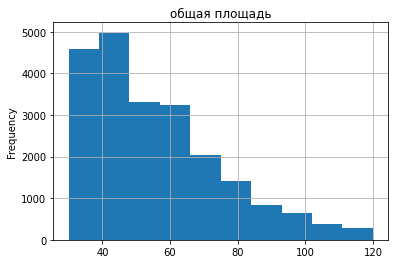

In [43]:
df['total_area'].plot(kind='hist', title='общая площадь', grid=True)

Основная масса квартир, которые есть в датасете, это квартиры общей площадью от 30 до 65 м2. 30 м2 это конечно мало, но для скромных апартаментов в самый раз.

<AxesSubplot:title={'center':'жилая площадь'}, ylabel='Frequency'>

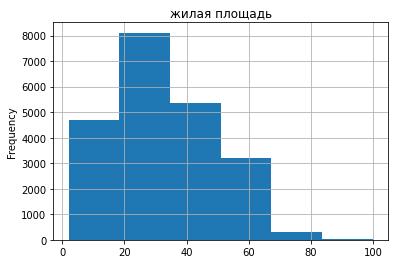

In [44]:
df['living_area'].plot(kind='hist', title='жилая площадь', grid=True, bins=6)

Данные по жилой площади выглядят схоже с данными по общей площади. Схожи их распределения. Большая часть квртир в данных имеет жилую площадь до 45 м2.

<AxesSubplot:title={'center':'площадь кухни'}, ylabel='Frequency'>

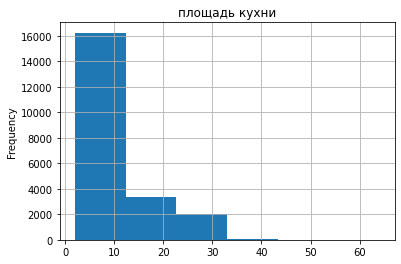

In [45]:
df['kitchen_area'].plot(kind='hist', title='площадь кухни', grid=True, bins=6)

Площадь кухни варьируется от 2 до 12 м2 в основной массе данных.

<AxesSubplot:title={'center':'цена продажи'}, ylabel='Frequency'>

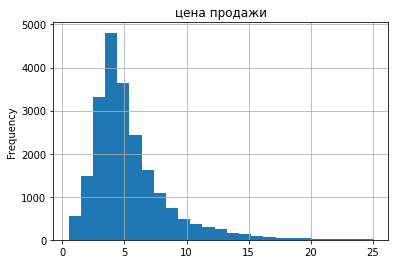

In [46]:
(df['last_price']/1000000).plot(kind='hist', title='цена продажи', grid=True, bins=25)

Гистограмма цены продажи подтверждает очевидное - люди больше всего покупают дешового, доступного жилья. Жилья в пределах 5-6 миллионов. После этой суммы количество сделок начинает резко падать.

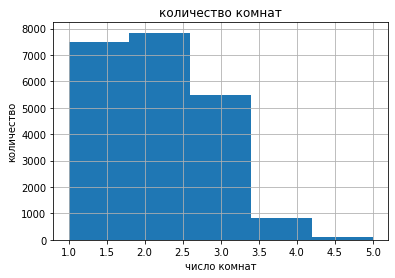

In [47]:
df['rooms'].plot(kind='hist', title='количество комнат', grid=True, bins=5)
plt.xlabel('число комнат')
plt.ylabel('количество')
plt.show()

Большим спросом пользуются квартиры с количеством комнат равным 1-2, на втором месте трешки, а на квартиры 4-5 комнатные спрос заметно ниже. 

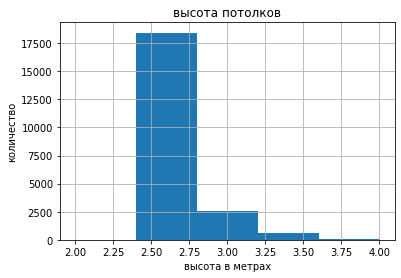

In [48]:
df['ceiling_height'].plot(kind='hist', title='высота потолков', grid=True, bins=5)
plt.xlabel('высота в метрах')
plt.ylabel('количество')
plt.show()

В данных в основном представлены квартиры с высотой потолков в диапазоне 2,30 - 2,8 м. 

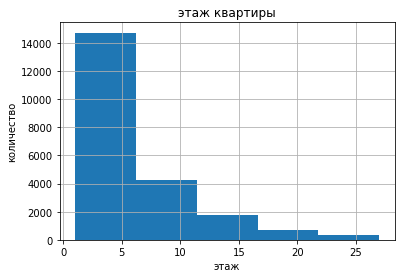

In [49]:
df['floor'].plot(kind='hist', title='этаж квартиры', grid=True, bins=5)
plt.xlabel('этаж')
plt.ylabel('количество')
plt.show()

Как видно из гистограммы основу данных составляют квартиры с первого по шестой этаж.

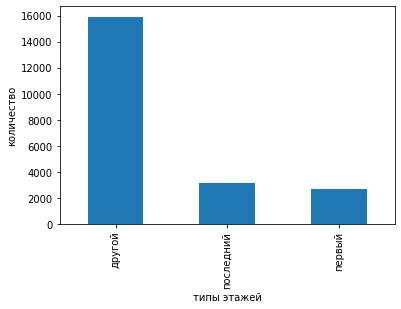

In [50]:
df['type_floor'].value_counts().plot(kind='bar')
plt.xlabel('типы этажей')
plt.ylabel('количество')
plt.show()

Больше всего в данных квартир между первым и последним этажом. Меньше всего на первом. Возможно у людей квартиры на первых этажах пользуются меньшим спросом.

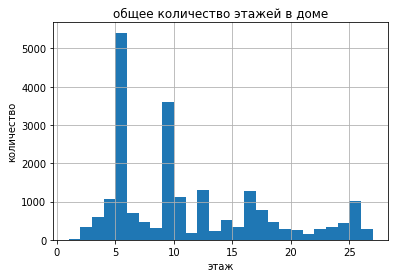

In [51]:
df['floors_total'].plot(kind='hist', title='общее количество этажей в доме', grid=True, bins=26)
plt.xlabel('этаж')
plt.ylabel('количество')
plt.show()

Согласно гистограмме в данных больше всего информации о продаже квартир в пяти- и девятиэтажках.

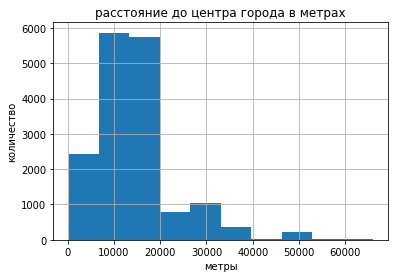

In [52]:
df['cityсenters_nearest'].plot(kind='hist', title='расстояние до центра города в метрах', grid=True)
plt.xlabel('метры')
plt.ylabel('количество')
plt.show()

Основной костяк данных составляют квартиры расположенные в пределах 20км от центра города.

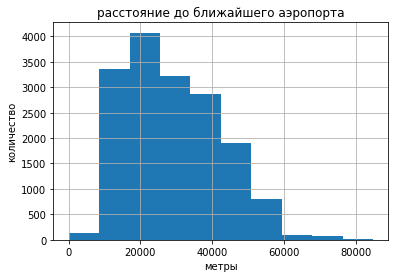

In [53]:
df['airports_nearest'].plot(kind='hist', title='расстояние до ближайшего аэропорта', grid=True, bins=10)
plt.xlabel('метры')
plt.ylabel('количество')
plt.show()

Согласно гистограмме больше всего квартир расположено в пределах 20 км до ближайшего аэропорта.

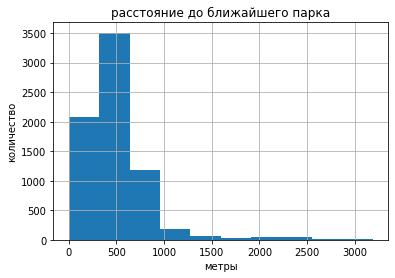

In [54]:
df['parks_nearest'].plot(kind='hist', title='расстояние до ближайшего парка', grid=True)
plt.xlabel('метры')
plt.ylabel('количество')
plt.show()

Согласно имеющимся данным большинство квартир расположено в пределах одного километра до ближайшего парка.

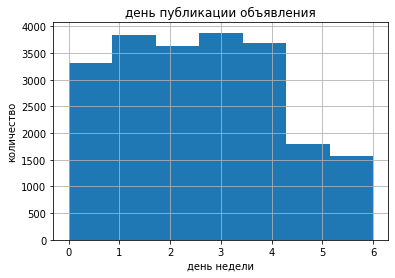

In [55]:
df['day_number'].plot(kind='hist', title='день публикации объявления', grid=True, bins=7)
plt.xlabel('день недели')
plt.ylabel('количество')
plt.show()

Объявления о продаже квартир как правило публикуются в будние дни. В выходные количество публикаций резко сокращается.

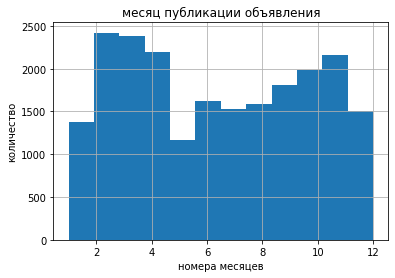

In [56]:
df['month_number'].plot(kind='hist', title='месяц публикации объявления', grid=True, bins=12)
plt.xlabel('номера месяцeв')
plt.ylabel('количество')
plt.show()

Согласно данных в летние месяцы публикуется меньше объявлений, чем весной или осенью. Основной пик публикаций приходится на весну.

In [57]:
days_exposition_mean = round(df['days_exposition'].mean(), 0) # найдем среднее время и медианное время размещения объявления
days_exposition_median = df['days_exposition'].median()
print(f'Среднее число дней размещения объявления равно {days_exposition_mean}')
print(f'Медианное среднее число дней размещения объявления равно {days_exposition_median}')

Среднее число дней размещения объявления равно 177.0
Медианное среднее число дней размещения объявления равно 94.0


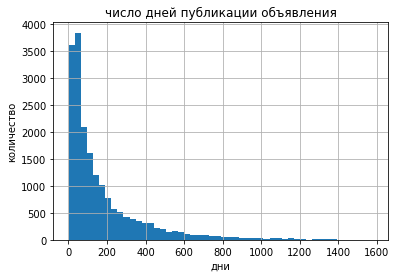

In [58]:
df['days_exposition'].plot(kind='hist', title='число дней публикации объявления', grid=True, bins=50)
plt.xlabel('дни')
plt.ylabel('количество')
plt.show()

В среднем продажа квартиры занимает 177 дней и это хорошо видно на гистограмме. Но медианное среднее составляет 94 дня. Это означает, что половина всех квартир была продана практически за 3 месяца (с небольшим). Так, вероятнее всего, стоит считать, что квартиры проданные за 3 месяца это квартиры проданные быстро. Все что более 3-х месяцев - наоборот долго.

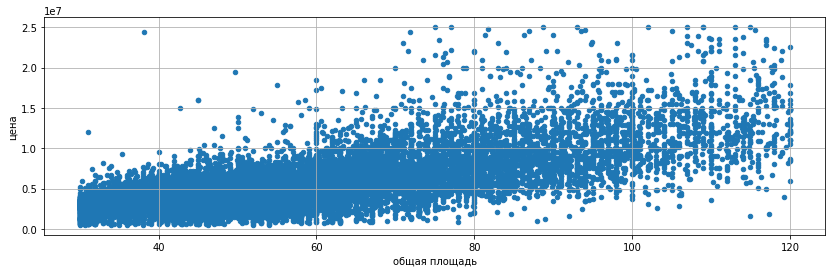

In [59]:
df.sort_values('total_area').plot(x='total_area', y='last_price', grid=True, figsize=(14, 4), kind='scatter')
plt.xlabel('общая площадь')
plt.ylabel('цена')
plt.show()

In [60]:
print('Корреляция между ценой и общей площадью равна:', round(df['last_price'].corr(df['total_area']), 2))

Корреляция между ценой и общей площадью равна: 0.72


Взаимосвязь итоговой стоимости с общей площадью очевидна: чем больше площадь, тем выше цена на жилье. График это подтверждает.

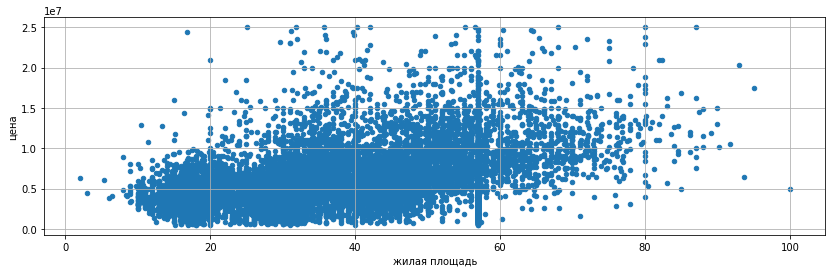

In [61]:
df.sort_values('living_area').plot(x='living_area', y='last_price', grid=True, figsize=(14, 4), kind='scatter')
plt.xlabel('жилая площадь')
plt.ylabel('цена')
plt.show()

In [62]:
print('Корреляция между ценой и жилой площадью равна:', round(df['last_price'].corr(df['living_area']), 2))

Корреляция между ценой и жилой площадью равна: 0.49


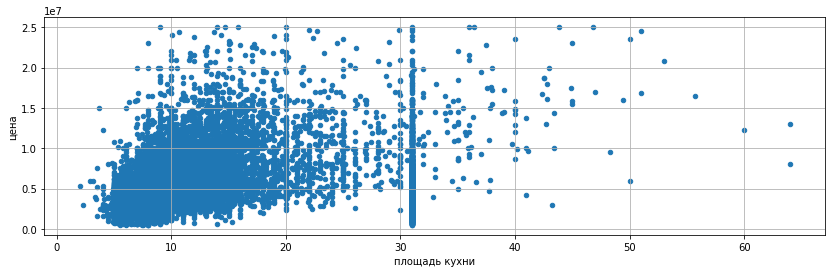

In [63]:
df.sort_values('kitchen_area').plot(x='kitchen_area', y='last_price', grid=True, figsize=(14, 4), kind='scatter')
plt.xlabel('площадь кухни')
plt.ylabel('цена')
plt.show()

In [64]:
print('Корреляция между ценой и площадью кухни равна:', round(df['last_price'].corr(df['kitchen_area']), 2))

Корреляция между ценой и площадью кухни равна: 0.3


Взаимосвязь жилой площади, площади кухни и итоговой стоимости квартиры также очевидна: чем больше площадь, чем комфортнее и просторней квартира, тем она дороже. На графиках хорошо виден восходящий тренд.

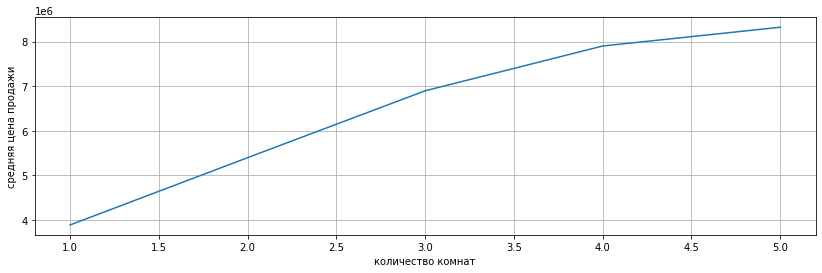

In [65]:
df.groupby('rooms')['last_price'].agg('mean').plot(x='rooms', y='last_price', grid=True, figsize=(14, 4))
plt.xlabel('количество комнат')
plt.ylabel('средняя цена продажи')
plt.show()

In [66]:
print('Корреляция между ценой и количеством комнат равна:', round(df['last_price'].corr(df['rooms']), 2))

Корреляция между ценой и количеством комнат равна: 0.41


Зависимость между числом комнат и стоимостью квартиры также есть: чем больше комнат, тем дороже жилье.

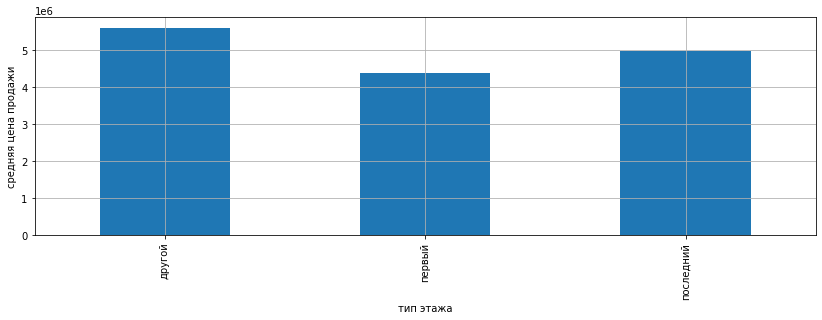

In [67]:
df.groupby('type_floor')['last_price'].agg('mean').plot(kind='bar', grid=True, figsize=(14, 4))
plt.xlabel('тип этажа')
plt.ylabel('средняя цена продажи')
plt.show()

Средняя цена продажи больше всего на квартиры между первым и последним этажом (категория "другой"). На втором месте квартиры на последнем этаже.

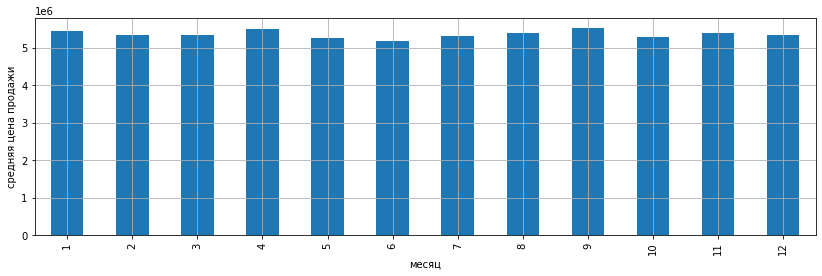

In [68]:
df.groupby('month_number')['last_price'].agg('mean').plot(kind='bar', grid=True, figsize=(14, 4))
plt.xlabel('месяц')
plt.ylabel('средняя цена продажи')
plt.show()

Рассматривая изменения средней цены по месяцам, можно заметить сезонность. Цена на квартиры меняется в течение года. Больше всего она в апреле и сентябре, а меньше всего летом - в июне-июле. Все же месяц важный, но не определяющий, параметр для продажи недвижимости, т.к. спрос на жилье имеет свойство меняться от сезона к сезону.

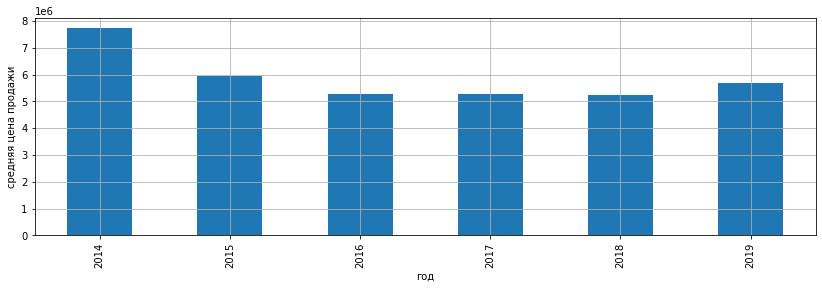

In [69]:
df.groupby('year')['last_price'].agg('mean').plot(kind='bar', grid=True, figsize=(14, 4))
plt.xlabel('год')
plt.ylabel('средняя цена продажи')
plt.show()

Изменения средней цены продажи квартиры по годам видны невооруженным взглядом. Средняя цена достигла наивесшего значения в 2014 году. После чего начался спад. Наименьшего значения, согласно данным, средняя цена достигла 2018 году.

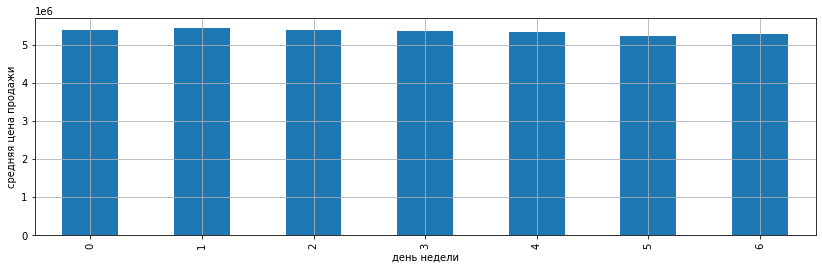

In [70]:
df.groupby('day_number')['last_price'].agg('mean').plot(kind='bar', grid=True, figsize=(14, 4))
plt.xlabel('день недели')
plt.ylabel('средняя цена продажи')
plt.show()

Но а день недели никак не влияет на среднюю цену продажи недвижимости. Это можно видеть на графике. Значения практически идентичны.

**Вывод:**<br>
Подводя итог можно сказать, что стоимость жилья сильно зависит от общей площади помещения, жилой площади, количества комнат, типа этажа, месяца, года и практически никак не зависит от дня недели.

In [71]:
top_10_city = df.value_counts('locality_name').head(10) # определили самые популярные населенные пункты, где были объявления о продаже.
top_10_city

locality_name
Санкт-Петербург      14176
посёлок Мурино         451
посёлок Шушары         423
Всеволожск             383
Пушкин                 341
Колпино                330
посёлок Парголово      312
Гатчина                301
деревня Кудрово        266
Выборг                 220
dtype: int64

In [72]:
top_10_city_list = ['Санкт-Петербург', 'Пушкин', 'посёлок Мурино', 'Гатчина', 'посёлок Шушары', 'Колпино', 'Выборг', 'Всеволожск', 'посёлок Парголово', 'деревня Кудрово']
good_df = df.query('locality_name in @top_10_city_list') # создадим нужную выборку, из которой потом найдем средние значения
df_stat = good_df.groupby('locality_name')['price_by_sqmetr'].agg('median')
df_stat = round(df_stat, 2).sort_values(ascending=False)
df_stat

locality_name
Санкт-Петербург      103258.78
Пушкин                99542.33
посёлок Парголово     91472.56
деревня Кудрово       91095.95
посёлок Мурино        83018.87
посёлок Шушары        75949.37
Колпино               74562.81
Гатчина               67796.61
Всеволожск            65789.47
Выборг                58001.42
Name: price_by_sqmetr, dtype: float64

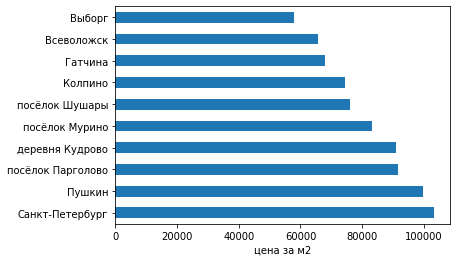

In [73]:
df_stat.plot(kind='barh')
plt.xlabel('цена за м2')
plt.ylabel(None)
plt.show()

Из 10 самых распространенных населенных пунктов, где продавалось жилье, самая дорогая стоимость за квадратный метр в Санкт-Петербурге. Стоимость составляет - 103258.78 руб. за 1 м2. Самая низкая цена за 1 м2 в Выборге. Она составляет 58001.42 руб.

In [79]:
df_pivot_locality_name = df.pivot_table(index='locality_name', values='price_by_sqmetr', aggfunc=['count', 'median'])
df_pivot_locality_name.columns = ['кол-во объявлений', 'медианная цена за 1кв. м']
df_pivot_locality_name.sort_values('кол-во объявлений', ascending=False).head(10)

,кол-во объявлений,медианная цена за 1кв. м
locality_name,,
Санкт-Петербург,14176,103258.785
посёлок Мурино,451,83018.870
посёлок Шушары,423,75949.370
Всеволожск,383,65789.470
Пушкин,341,99542.330
Колпино,330,74562.810
посёлок Парголово,312,91472.565
Гатчина,301,67796.610
деревня Кудрово,266,91095.950


In [74]:
data = df.query('locality_name == "Санкт-Петербург"') # найдем среднюю стоимость за км по Санкт-Петербургу.
price_per_km = data.pivot_table(index='to_cityсenter_km', values='price_by_sqmetr', aggfunc=('mean'))
price_per_km = round(price_per_km, 0)
price_per_km

,price_by_sqmetr
to_cityсenter_km,
0.0,116698.0
1.0,133462.0
2.0,132087.0
3.0,117089.0
4.0,125912.0
5.0,131098.0
6.0,129417.0
7.0,127220.0
8.0,121964.0


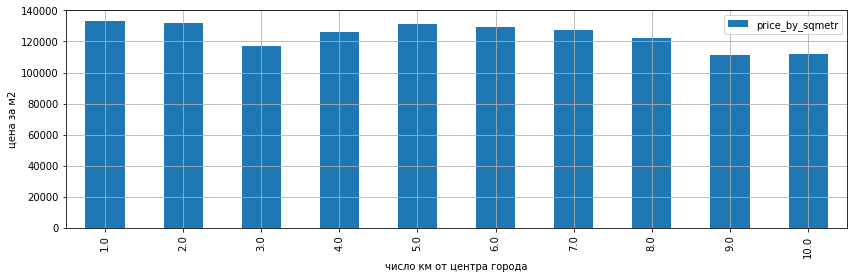

In [75]:
price_per_km.plot(kind='bar', grid=True, figsize=(14, 4))
plt.xlim(0.5, 10.5)
plt.xlabel('число км от центра города')
plt.ylabel('цена за м2')
plt.show()

Как видно из представленной таблицы и графика утверждение о том, что с отдаленностью от центра падает цена за квадратный метр жилья, является абсолютно верным. Стоимость квадратного метра по Санкт-Петербургу снизилась с 133462 до 111921 руб.

### Общий вывод

В заключение исследования мы можем сделать следующие выводы:

1. _В данных оказалось много аномалий касательно стоимости квартиры, высоты потолков, количества комнат и общей площади. После очистки датасета от аномалий его размер сократился на 8,35%, что не превышает допустимых норм. Датасет теперь пригоден для дальнейшего исследования, хотя и хранит довольно много пропусков в некоторых столбцах. Вероятно данные пропуски в данных связаны с техническими проблемами определения местоположения. Возможно эти же проблемы повлияли на отсутствие данных по расстоянию до ближайшего парка или водоема._
<br>

2. _В среднем продажа квартиры занимает 177 дней и это хорошо видно на гистограмме. Но медианное среднее составляет 94 дня. Это означает, что половина всех квартир была продана практически за 3 месяца (с небольшим). Так, вероятнее всего, стоит считать, что квартиры проданные за 3 месяца это квартиры проданные быстро. Все что более 3-х месяцев - наоборот долго._
<br>
3. _Можно сказать, что стоимость жилья сильно зависит от общей площади помещения, жилой площади, количества комнат, типа этажа, месяца, года и практически никак не зависит от дня недели._
<br>
4. _Из 10 самых распространенных населенных пунктов, где продавалось жилье, самая дорогая стоимость за квадратный метр в Санкт-Петербурге. Стоимость составляет - 103258.78 руб. за 1 м2. Самая низкая цена за 1 м2 в Выборге. Она составляет 58001.42 руб._

__В качестве общего вывода отметим, что на стоимость квартиры влияют множество факторов, которые нужно учитывать при заключении сделки. Основные из них: общая площадь помещения, жилая площадь, количество комнат, этаж, место (населенный пункт, локация), удаленность от центра.__